# Format and explore maternal mortality data

In [1]:
import os
import warnings

import camelot
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
# Load and format mortality data
data = camelot.read_pdf('../data/MMR-2018-State-Data-508.pdf', flavor='stream', pages='all', strip_text='†')
df = data[1].df
df = df.iloc[3:]
df = df[[0, 1, 2, 3, 4]]
df.rename(columns={
    0: 'State',
    1: 'Deaths',
    2: 'DeathRate',
    3: 'LowerCI',
    4: 'UpperCI'
}, inplace=True)
df = df[df['Deaths'] != '']
df.to_csv('../data/maternal_mortality.csv', index=False)

In [3]:
# Load geography
states = geopandas.read_file('../data/cb_2020_us_state_500k/cb_2020_us_state_500k.shp')

# Remove extras (removed Alaska and Hawaii just for plotting)
extra = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Puerto Rico',
         'United States Virgin Islands', 'Guam', 'Alaska', 'Hawaii']
states = states[states['NAME'].isin(extra) == False]

In [4]:
# Merge data sets
df2 = states.copy()
df2 = df2.merge(
    df,
    how='right',
    left_on='NAME',
    right_on='State'
)

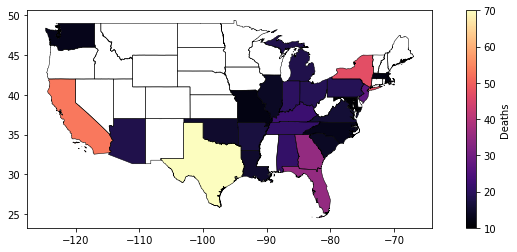

In [5]:
# Take a look at death counts by state
fig, ax = plt.subplots(figsize=(12, 4))
states.boundary.plot(edgecolor='k', linewidth=0.5, ax=ax)
df2['Deaths'] = df2['Deaths'].astype(int)
df2.plot(cmap='magma', column='Deaths', legend=True, legend_kwds={'label': 'Deaths'}, ax=ax);

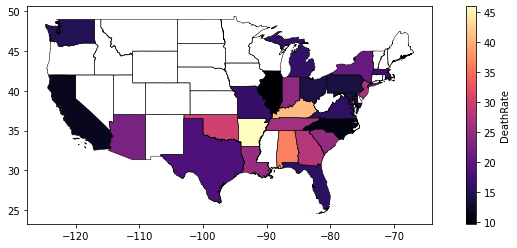

In [6]:
# Take a look at death rate by state
fig, ax = plt.subplots(figsize=(12, 4))
states.boundary.plot(edgecolor='k', linewidth=0.5, ax=ax)
df2['DeathRate'] = df2['DeathRate'].astype(float)
df2.plot(cmap='magma', column='DeathRate', legend=True, legend_kwds={'label': 'DeathRate'}, ax=ax);